In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('Data/Processed Dataset 2010.csv')

In [75]:
df.columns

Index(['ID', 'Weight_Ind', 'Region', 'Area_type', 'Household Number', 'Q203_1',
       'Q207a', 'Q207b', 'Q301a_1', 'Q301a_2', 'Q301a_3', 'Q301a_4', 'Q301a_5',
       'Q301a_6', 'Q301a_7', 'Q301a_8', 'Q303', 'Q304_1', 'Q401_1', 'Q503',
       'Q505b', 'Q506', 'Q507', 'Q601a', 'Q601b_1', 'Q1201', 'Q1202', 'Q1208',
       'Q1209_1', 'Q1213', 'Q1214', 'Age', 'Gender', 'Income', 'Marital',
       'Banked/Unbanked', 'Credit', 'Saving', 'Remittances', 'Education',
       'Income_Sources', 'Age2'],
      dtype='object')

## Extract Required Columns

In [76]:
df = df[['Region', 'Area_type', 'Household Number', 'Age', 'Gender', 'Marital',
       'Banked/Unbanked', 'Credit', 'Saving', 'Remittances', 'Education',
       'Income_Sources', 'Q1213', 'Q1214']]

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            3453 non-null   object 
 1   Area_type         3453 non-null   object 
 2   Household Number  3453 non-null   float64
 3   Age               3453 non-null   object 
 4   Gender            3453 non-null   object 
 5   Marital           3453 non-null   object 
 6   Banked/Unbanked   3454 non-null   object 
 7   Credit            3454 non-null   object 
 8   Saving            3454 non-null   object 
 9   Remittances       3454 non-null   object 
 10  Education         3454 non-null   object 
 11  Income_Sources    3454 non-null   object 
 12  Q1213             3448 non-null   object 
 13  Q1214             3453 non-null   object 
dtypes: float64(1), object(13)
memory usage: 377.9+ KB


In [78]:
df.head()

,Region,Area_type,Household Number,Age,Gender,Marital,Banked/Unbanked,Credit,Saving,Remittances,Education,Income_Sources,Q1213,Q1214
0,Greater Accra,Urban,2.0,50,Male,Married,Banked,Credit from family and friends,Saving at bank,Not remitting,Primary education,Formally employed Private,Below GH¢200 per month,GH¢201 - GH¢400 per month
1,Greater Accra,Urban,1.0,31,Male,Divorced,Banked,Credit from family and friends,Saving at bank,Remitting informally,Primary education,Farming and Fishing,GH¢201 - GH¢400 per month,GH¢201 - GH¢400 per month
2,Greater Accra,Urban,4.0,32,Female,Never married,Informal,Not borrowing,Saving informally,Not remitting,Secondary education,Self employed,Below GH¢200 per month,Below GH¢200 per month
3,Greater Accra,Urban,5.0,45,Female,Married,Banked,Not borrowing,Saving at bank,Not remitting,No formal education,Self employed,Below GH¢200 per month,Don't know
4,Greater Accra,Urban,3.0,55,Male,Married,Banked,Not borrowing,Saving at bank,Not remitting,Primary education,Self employed,Below GH¢200 per month,Below GH¢200 per month


In [79]:
df.tail()

,Region,Area_type,Household Number,Age,Gender,Marital,Banked/Unbanked,Credit,Saving,Remittances,Education,Income_Sources,Q1213,Q1214
3449,Upper East,Rural,2.0,68,Male,Married,Banked,Credit from bank,Saving at bank,Remiting through family and friends,No formal education,Other Income,GH¢201 - GH¢400 per month,GH¢401 - GH¢600 per month
3450,Greater Accra,Urban,1.0,28,Male,Never married,Other formal (non-bank),Not borrowing,Not saving,Remitting through other formal (non-bank),Secondary education,Informally employed,Below GH¢200 per month,GH¢201 - GH¢400 per month
3451,Greater Accra,Urban,8.0,53,Female,Separated,Informal,Not borrowing,Saving informally,Not remitting,Primary education,Self employed,Don't know,Don't know
3452,Upper East,Rural,2.0,62,Male,Widowed,Excluded,Not borrowing,Saving at home,Remiting through family and friends,No formal education,Farming and Fishing,Below GH¢200 per month,Below GH¢200 per month
3453,NaN,NaN,NaN,NaN,NaN,NaN,Excluded,Not borrowing,Not saving,Not remitting,Other/Dont know,Dont Know,NaN,NaN


## Data preprocessing

In [80]:
df['Region'].unique()

array(['Greater Accra', 'Ashanti', 'Western', 'Central', 'Volta',
       'Eastern', 'Upper West', 'Brong Ahafo', 'Northern', 'Upper East',
       nan], dtype=object)

In [81]:
df['Area_type'].unique()

array(['Urban', 'Rural', nan], dtype=object)

In [82]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [83]:
df['Marital'].unique()
# We have missing data as'Not Answered/Missing data'
# Lets fix that

array(['Married', 'Divorced', 'Never married', 'Widowed',
       'Not Answered/Missing data', 'Separated', nan], dtype=object)

In [84]:
df['Marital'].replace({'Not Answered/Missing data':np.nan}, inplace=True)

In [85]:
# Let us check again
df['Marital'].unique()
# Gone

array(['Married', 'Divorced', 'Never married', 'Widowed', nan,
       'Separated'], dtype=object)

In [86]:
df['Banked/Unbanked'].unique()

array(['Banked', 'Informal', 'Excluded', 'Other formal (non-bank)'],
      dtype=object)

In [87]:
#Let us change the values to Either Banked or unbanked
df['Banked/Unbanked'].replace({'Informal':'Unbanked', 'Excluded':'Unbanked',
                               'Other formal (non-bank)':'Unbanked'}, inplace=True)

In [88]:
df['Banked/Unbanked'].unique()

array(['Banked', 'Unbanked'], dtype=object)

In [89]:
df['Credit'].unique()
# we can group this to either having credit from banks or not borrowing from banks - suggestion

array(['Credit from family and friends', 'Not borrowing',
       'Credit from other formal (non-bank)',
       'Credit from informal sources', 'Credit from bank'], dtype=object)

In [90]:
df['Saving'].unique()

array(['Saving at bank', 'Saving informally', 'Not saving',
       'Saving at other formal (non-bank)', 'Saving at home'],
      dtype=object)

In [91]:
df['Remittances'].unique()

array(['Not remitting', 'Remitting informally',
       'Remiting through family and friends', 'Remitting through bank',
       'Remitting through other formal (non-bank)'], dtype=object)

In [92]:
df['Education'].unique()

array(['Primary education', 'Secondary education', 'No formal education',
       'Other/Dont know', 'Vocational/Specialised training',
       'Tertiary education'], dtype=object)

In [93]:
df['Income_Sources'].unique()

array(['Formally employed Private', 'Farming and Fishing',
       'Self employed', 'Remittance Dependent', 'Informally employed',
       'Other Income', 'Dont Know'], dtype=object)

In [94]:
df['Q1213'].unique()
# lets change dont know & Refused to answer to missing data

array(['Below GH¢200 per month', 'GH¢201 - GH¢400 per month', 'No income',
       'GH¢401 - GH¢600 per month', "Don't know", 'Refused to answer',
       'Over GH¢2201 per month', 'GH¢601 - GH¢800 per month',
       'GH¢801 - GH¢1000 per month', 'GH¢1001 - GH¢1200 per month',
       'GH¢1801 - GH¢2000 per month', 'GH¢2001 - GH¢2200 per month',
       'GH¢1201 - GH¢1400 per month', nan, 'GH¢1401 - GH¢1600 per month',
       'GH¢1601 - GH¢1800 per month'], dtype=object)

In [95]:
df['Q1213'].replace({"Don't know":np.nan, 'Refused to answer':np.nan}, inplace=True)

In [96]:
df['Q1213'].unique()

array(['Below GH¢200 per month', 'GH¢201 - GH¢400 per month', 'No income',
       'GH¢401 - GH¢600 per month', nan, 'Over GH¢2201 per month',
       'GH¢601 - GH¢800 per month', 'GH¢801 - GH¢1000 per month',
       'GH¢1001 - GH¢1200 per month', 'GH¢1801 - GH¢2000 per month',
       'GH¢2001 - GH¢2200 per month', 'GH¢1201 - GH¢1400 per month',
       'GH¢1401 - GH¢1600 per month', 'GH¢1601 - GH¢1800 per month'],
      dtype=object)

In [97]:
df['Q1214'].unique()
# do same as for Q1213

array(['GH¢201 - GH¢400 per month', 'Below GH¢200 per month',
       "Don't know", 'GH¢401 - GH¢600 per month', 'No income',
       'GH¢1001 - GH¢1200 per month', 'Refused to answer',
       'GH¢1601 - GH¢1800 per month', 'GH¢1401 - GH¢1600 per month',
       'GH¢601 - GH¢800 per month', 'GH¢1201 - GH¢1400 per month',
       'Over GH¢2201 per month', 'GH¢801 - GH¢1000 per month',
       'GH¢2001 - GH¢2200 per month', 'Not answered/Missing Data',
       'GH¢1801 - GH¢2000 per month', nan], dtype=object)

In [98]:
df['Q1214'].replace({"Don't know":np.nan, 'Refused to answer':np.nan,
                     'Not answered/Missing Data':np.nan}, inplace=True)

In [99]:
df['Age'].unique()

array(['50', '31', '32', '45', '55', '38', '20', '18', '60', '24', '48',
       '29', '23', '80', '21', '37', '42', '30', '61', '27', '67', '25',
       '26', '28', '76', '41', '34', '35', '78', '22', '53', '52', '71',
       '46', '74', '40', '63', '68', '54', '49', '36', '19', '33', '65',
       '58', '69', '72', '62', '85', '51', '73', 'Not indicated', '39',
       '47', '59', '66', '70', '75', '44', '89', '81', '77', '57', '56',
       '43', '64', '86', '99', '88', '96', '79', '90', '84', '82', '95',
       '83', '97', '98', nan], dtype=object)

In [100]:
df['Age'].replace({'Not indicated':np.nan}, inplace=True)

## Visualize missing data

In [101]:
df.isna().sum()

Region                1
Area_type             1
Household Number      1
Age                  16
Gender                1
Marital              25
Banked/Unbanked       0
Credit                0
Saving                0
Remittances           0
Education             0
Income_Sources        0
Q1213               488
Q1214               931
dtype: int64

<AxesSubplot:>

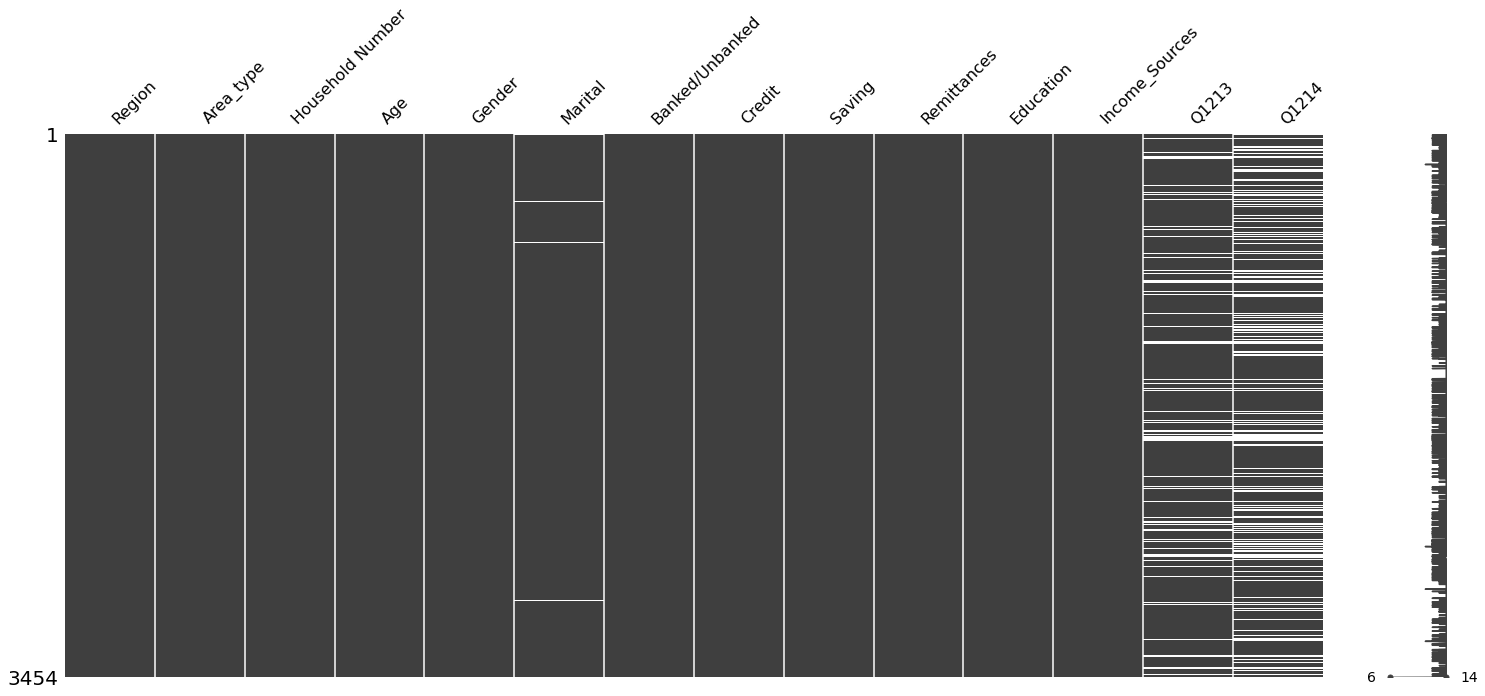

In [102]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

As we can see the total household column has alot of missing data. we can drop the column and  drop missing values from other columns

In [103]:
df.drop('Q1214', inplace=True, axis=1)

In [104]:
## drop missing values
df.dropna(inplace=True)

In [105]:
df.isna().sum()
# we have  no missing data now

Region              0
Area_type           0
Household Number    0
Age                 0
Gender              0
Marital             0
Banked/Unbanked     0
Credit              0
Saving              0
Remittances         0
Education           0
Income_Sources      0
Q1213               0
dtype: int64

## Label Encoding

Machine learning only works with numerical data.let us change the categerical columns into numbers

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2932 entries, 0 to 3452
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            2932 non-null   object 
 1   Area_type         2932 non-null   object 
 2   Household Number  2932 non-null   float64
 3   Age               2932 non-null   object 
 4   Gender            2932 non-null   object 
 5   Marital           2932 non-null   object 
 6   Banked/Unbanked   2932 non-null   object 
 7   Credit            2932 non-null   object 
 8   Saving            2932 non-null   object 
 9   Remittances       2932 non-null   object 
 10  Education         2932 non-null   object 
 11  Income_Sources    2932 non-null   object 
 12  Q1213             2932 non-null   object 
dtypes: float64(1), object(12)
memory usage: 320.7+ KB


In [107]:
# Convert age column into an integer
df['Age'] = df['Age'].apply(lambda x: int(x))

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2932 entries, 0 to 3452
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            2932 non-null   object 
 1   Area_type         2932 non-null   object 
 2   Household Number  2932 non-null   float64
 3   Age               2932 non-null   int64  
 4   Gender            2932 non-null   object 
 5   Marital           2932 non-null   object 
 6   Banked/Unbanked   2932 non-null   object 
 7   Credit            2932 non-null   object 
 8   Saving            2932 non-null   object 
 9   Remittances       2932 non-null   object 
 10  Education         2932 non-null   object 
 11  Income_Sources    2932 non-null   object 
 12  Q1213             2932 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 320.7+ KB


We now have only have two numerical column

### Approach 1 - scikit-learn library approach

In [109]:
df.columns

Index(['Region', 'Area_type', 'Household Number', 'Age', 'Gender', 'Marital',
       'Banked/Unbanked', 'Credit', 'Saving', 'Remittances', 'Education',
       'Income_Sources', 'Q1213'],
      dtype='object')

In [110]:
from sklearn.preprocessing import LabelEncoder
# create an instance of label encoders
labelencoder = LabelEncoder()
# Creating numerical values and storing them in new columns
df['Region_N'] = labelencoder.fit_transform(df['Region'])
df['Area_type_N'] = labelencoder.fit_transform(df['Area_type'])
df['Gender_N'] = labelencoder.fit_transform(df['Gender'])
df['Marital_N'] = labelencoder.fit_transform(df['Marital'])
df['Banked/Unbanked_N'] = labelencoder.fit_transform(df['Banked/Unbanked'])
df['Credit_N'] = labelencoder.fit_transform(df['Credit'])
df['Saving_N'] = labelencoder.fit_transform(df['Saving'])
df['Remittances_N'] = labelencoder.fit_transform(df['Remittances'])
df['Education_N'] = labelencoder.fit_transform(df['Education'])
df['Income_Sources_N'] = labelencoder.fit_transform(df['Income_Sources'])
df['Q1213_N'] = labelencoder.fit_transform(df['Q1213'])

In [111]:
df.head()

,Region,Area_type,Household Number,Age,Gender,Marital,Banked/Unbanked,Credit,Saving,Remittances,...,Area_type_N,Gender_N,Marital_N,Banked/Unbanked_N,Credit_N,Saving_N,Remittances_N,Education_N,Income_Sources_N,Q1213_N
0,Greater Accra,Urban,2.0,50,Male,Married,Banked,Credit from family and friends,Saving at bank,Not remitting,...,1,1,1,0,1,1,0,2,2,0
1,Greater Accra,Urban,1.0,31,Male,Divorced,Banked,Credit from family and friends,Saving at bank,Remitting informally,...,1,1,0,0,1,1,2,2,1,7
2,Greater Accra,Urban,4.0,32,Female,Never married,Unbanked,Not borrowing,Saving informally,Not remitting,...,1,0,2,1,4,4,0,3,6,0
3,Greater Accra,Urban,5.0,45,Female,Married,Banked,Not borrowing,Saving at bank,Not remitting,...,1,0,1,0,4,1,0,0,6,0
4,Greater Accra,Urban,3.0,55,Male,Married,Banked,Not borrowing,Saving at bank,Not remitting,...,1,1,1,0,4,1,0,2,6,0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2932 entries, 0 to 3452
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             2932 non-null   object 
 1   Area_type          2932 non-null   object 
 2   Household Number   2932 non-null   float64
 3   Age                2932 non-null   int64  
 4   Gender             2932 non-null   object 
 5   Marital            2932 non-null   object 
 6   Banked/Unbanked    2932 non-null   object 
 7   Credit             2932 non-null   object 
 8   Saving             2932 non-null   object 
 9   Remittances        2932 non-null   object 
 10  Education          2932 non-null   object 
 11  Income_Sources     2932 non-null   object 
 12  Q1213              2932 non-null   object 
 13  Region_N           2932 non-null   int32  
 14  Area_type_N        2932 non-null   int32  
 15  Gender_N           2932 non-null   int32  
 16  Marital_N          2932 

In [115]:
# Extract numerical columns
df2 = df.drop(['Region', 'Area_type', 'Gender', 'Marital',
       'Banked/Unbanked', 'Credit', 'Saving', 'Remittances', 'Education',
       'Income_Sources', 'Q1213'], axis=1)

In [116]:
df2.head()

,Household Number,Age,Region_N,Area_type_N,Gender_N,Marital_N,Banked/Unbanked_N,Credit_N,Saving_N,Remittances_N,Education_N,Income_Sources_N,Q1213_N
0,2.0,50,4,1,1,1,0,1,1,0,2,2,0
1,1.0,31,4,1,1,0,0,1,1,2,2,1,7
2,4.0,32,4,1,0,2,1,4,4,0,3,6,0
3,5.0,45,4,1,0,1,0,4,1,0,0,6,0
4,3.0,55,4,1,1,1,0,4,1,0,2,6,0


In [121]:
## Export dataset for model building
df2.to_csv('Data/train.csv', index=False)

## Feature Engineering 

### 1. Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

Below I use the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Bank Account Prediction Dataset.

In [124]:
df2.columns

Index(['Household Number', 'Age', 'Region_N', 'Area_type_N', 'Gender_N',
       'Marital_N', 'Banked/Unbanked_N', 'Credit_N', 'Saving_N',
       'Remittances_N', 'Education_N', 'Income_Sources_N', 'Q1213_N'],
      dtype='object')

In [125]:
X = df2[['Household Number', 'Age', 'Region_N', 'Area_type_N', 'Gender_N',
       'Marital_N', 'Credit_N', 'Saving_N',
       'Remittances_N', 'Education_N', 'Income_Sources_N', 'Q1213_N']]
y = df2['Banked/Unbanked_N'] 

In [127]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

               Specs       Score
8      Remittances_N  557.485728
9        Education_N  449.925038
11           Q1213_N  182.746560
3        Area_type_N  168.631378
7           Saving_N  127.524927
6           Credit_N   51.532366
2           Region_N   28.959042
10  Income_Sources_N   20.971973
4           Gender_N   15.645346
1                Age    1.343313


### 2. Feature Importance
We can get the feature importance of each feature in our dataset by using the feature importance property of the model.

Feature importance gives us a score for each feature of our data, the higher the score more important or relevant is the feature towards our output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.03661299 0.04939773 0.0381871  0.05861674 0.01506083 0.02376769
 0.05458718 0.48742387 0.0706876  0.08996225 0.04467437 0.03102166]


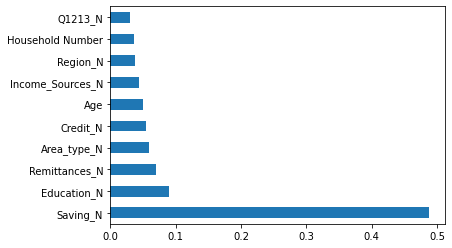

In [130]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [132]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, df2['Banked/Unbanked_N']], axis = 1)
PCA_df['Banked/Unbanked_N'] = LabelEncoder().fit_transform(PCA_df['Banked/Unbanked_N'])
PCA_df.head()

,PC1,PC2,Banked/Unbanked_N
0,11.656528,-2.908400,0
1,-7.424393,3.743960,0
2,-6.439378,-3.069126,1
3,6.631538,-2.820787,0
4,16.579812,-2.613851,0


In [133]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [134]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [135]:
forest_test(X, y)

2.90625
[[277  31]
 [  1 571]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       308
           1       0.95      1.00      0.97       572

    accuracy                           0.96       880
   macro avg       0.97      0.95      0.96       880
weighted avg       0.97      0.96      0.96       880



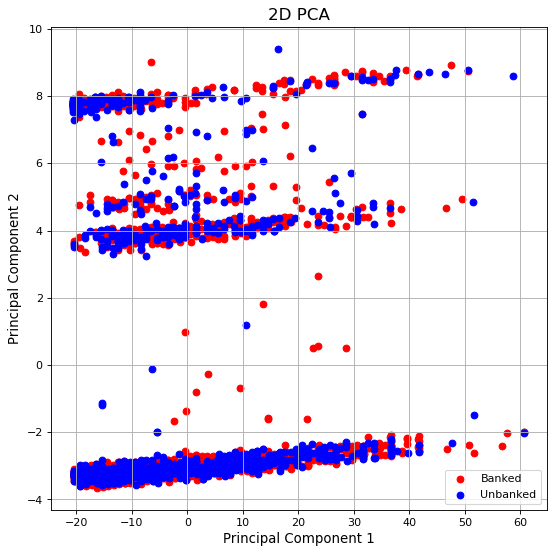

In [138]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['Banked/Unbanked_N'] == clas, 'PC1'], 
                PCA_df.loc[PCA_df['Banked/Unbanked_N'] == clas, 'PC2'], 
                c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Banked', 'Unbanked'])
plt.grid()

In [139]:
pca = PCA(n_components=3,svd_solver='full')
X_pca = pca.fit_transform(X)
print(pca.explained_variance_)

forest_test(X_pca, y)

[240.3026758   18.45516201   9.08924387]
4.21875
[[143 165]
 [ 93 479]]
              precision    recall  f1-score   support

           0       0.61      0.46      0.53       308
           1       0.74      0.84      0.79       572

    accuracy                           0.71       880
   macro avg       0.67      0.65      0.66       880
weighted avg       0.70      0.71      0.70       880

